# Multiple-objective portfolio optimization

# INTRODUCTION

Your task is to solve a multiple-objective portfolio optimization problem.
-  Use the basic Markowitz's model from 1952 (see Lecture 1)
-  Solve = construct Pareto front approximations.
-  The dataset is the same as for the portfolio game part 1 (bundle1.zip).
-  The dataset consists of the historical prices of 20 assets.
-  The bundle contains 20 files (*.txt) linked to different assets.
-  The name of the file suggests the asset's name.
-  The structure of every file is as follows:
1.  The first line contains the name of the asset.
2. The second line provides the number of data points N.
3. The following N lines are data points with the structure: time, price.
-  The historical timeline for all assets is time $\in$ [0,100].
-  Future predictions should be calculated for time = 200.

Goal: 
-  Load data, make predictions, and build the model. 
-  Illustrate your predictions (can be done in the jupyter notebook)
-  Then, implement the WSM and ECM methods (see the tutorial on quadratic programming provided below). 
-  Run your implementations for different calculation limits (e.g., the number of weight vectors for WSM). Compare the methods' efficiency in finding unique Pareto optimal solutions. Finally, illustrate generated Pareto fronts.

# Short tutorial on the cvxopt library for quadratic programming

In [1]:
import numpy as np
from cvxopt import matrix, solvers

# QP Optimization Problem

### General model:

$max$ $\boldsymbol{cx} - \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{x} \geq \boldsymbol{0}$

### But the library uses the following form:

$min$ $\boldsymbol{cx} + \dfrac{1}{2}\boldsymbol{x}^T\boldsymbol{Qx}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ <br>

### Exmple

$min$ $2x^2_1+x_2^2+x_1x_2+x_1+x_2$ <br>
$s.t.$ <br>
$x_1 \geq 0$<br>
$x_2 \geq 0$<br>
$x_1 + x_2 = 1$<br>

### Hence:

In [2]:
Q = matrix([ [4.0, 1.0], [1.0, 2.0] ]) ## [4, 1] is 1st column, not row!

In [3]:
c = matrix([1.0, 1.0]) ### (1, 2) = dimensions (1 row and 2 columns)

In [4]:
A = matrix([1.0, 1.0], (1,2)) ### (1, 2) = dimensions (1 row and 2 columns)

In [5]:
b = matrix(1.0) 

In [6]:
G = matrix([[-1.0,0.0],[0.0,-1.0]]) ### multiplied both sides by -1

In [7]:
h = matrix([0.0,0.0]) ### multiplied both sides by -1

In [8]:
solQP=solvers.qp(Q, c, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  2e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  1e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  2e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  3e-16  5e-08
Optimal solution found.


In [9]:
print(solQP.keys())

dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'iterations'])


In [10]:
print(solQP['x'])
print(solQP['primal objective'])

[ 2.50e-01]
[ 7.50e-01]

1.875000000000018


# We can also solve LP problems:

$min$ $\boldsymbol{c}\boldsymbol{x}$ <br>
$s.t.$ <br>
$\boldsymbol{Gx} \leq \boldsymbol{h}$ <br>
$\boldsymbol{Ax} = \boldsymbol{b}$ (optional)

### Exmple

$min$ $2x_1+x_2$ <br>
$s.t.$ <br>
$-x_1 +x_2 \leq 1$ <br>
$x_1 + x_2 \geq 2$ <br>
$x_2 \geq 0$<br>
$x_1 - 2x_2 \leq 4$

In [11]:
G = matrix([ [-1.0, -1.0, 0.0, 1.0], [1.0, -1.0, -1.0, -2.0] ])
h = matrix([ 1.0, -2.0, 0.0, 4.0 ])
c = matrix([ 2.0, 1.0 ])
solLP = solvers.lp(c,G,h)  
###!!!! OPTIONALLY A and b can be provided (equality constraints) as in solQP=solvers.qp(Q, c, G, h, A, b)

     pcost       dcost       gap    pres   dres   k/t
 0:  2.6471e+00 -7.0588e-01  2e+01  8e-01  2e+00  1e+00
 1:  3.0726e+00  2.8437e+00  1e+00  1e-01  2e-01  3e-01
 2:  2.4891e+00  2.4808e+00  1e-01  1e-02  2e-02  5e-02
 3:  2.4999e+00  2.4998e+00  1e-03  1e-04  2e-04  5e-04
 4:  2.5000e+00  2.5000e+00  1e-05  1e-06  2e-06  5e-06
 5:  2.5000e+00  2.5000e+00  1e-07  1e-08  2e-08  5e-08
Optimal solution found.


In [12]:
print(solLP.keys())

dict_keys(['x', 'y', 's', 'z', 'status', 'gap', 'relative gap', 'primal objective', 'dual objective', 'primal infeasibility', 'dual infeasibility', 'primal slack', 'dual slack', 'residual as primal infeasibility certificate', 'residual as dual infeasibility certificate', 'iterations'])


In [13]:
print(solLP['x'])
print(solLP['primal objective'])

[ 5.00e-01]
[ 1.50e+00]

2.4999999895543077


# Portfolio optimization

 Weight's Order:
 
 - 1 SuperFuture
 - 2 Apples
 - 3 WorldNow
 - 4 Electronics123
 - 5 Photons
 - 6 SpaceNow
 - 7 PearPear
 - 8 PositiveCorrelation
 - 9 BetterTechnology
 - 10 ABCDE
 - 11 EnviroLike
 - 12 Moneymakers
 - 13 Fuel4
 - 14 MarsProject
 - 15 CPU-XYZ
 - 16 RoboticsX
 - 17 Lasers
 - 18 WaterForce
 - 19 SafeAndCare
 - 20 BetterTomorrow

In [14]:
### SOLVE HERE

order = ["SuperFuture", "Apples", "WorldNow", "Electronics123", "Photons", "SpaceNow", "PearPear",
         "PositiveCorrelation", "BetterTechnology", "ABCDE", "EnviroLike", "Moneymakers", "Fuel4",
         "MarsProject", "CPU-XYZ", "RoboticsX", "Lasers", "WaterForce", "SafeAndCare", "BetterTomorrow"]

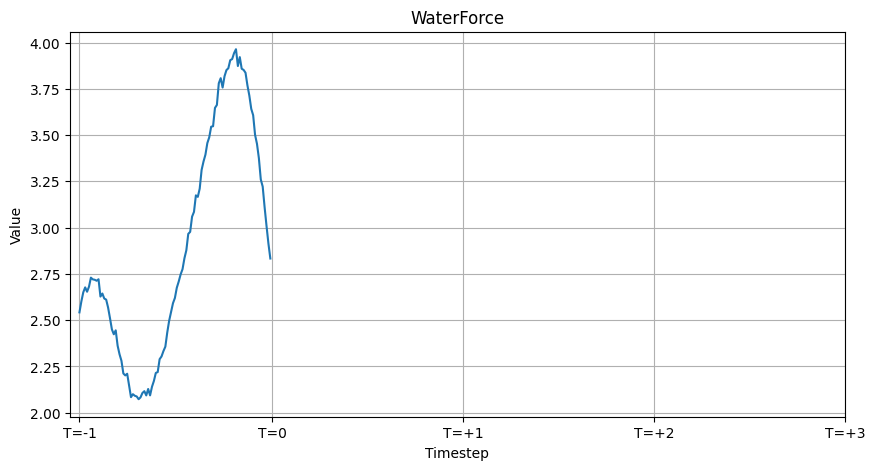

In [15]:
from utils.MOO_utilities import *

dr = DataReader("./data/Bundle1")
dr.read_data()
dr.plot()
data = dr.get_data()
assert len(data.keys()) == 20

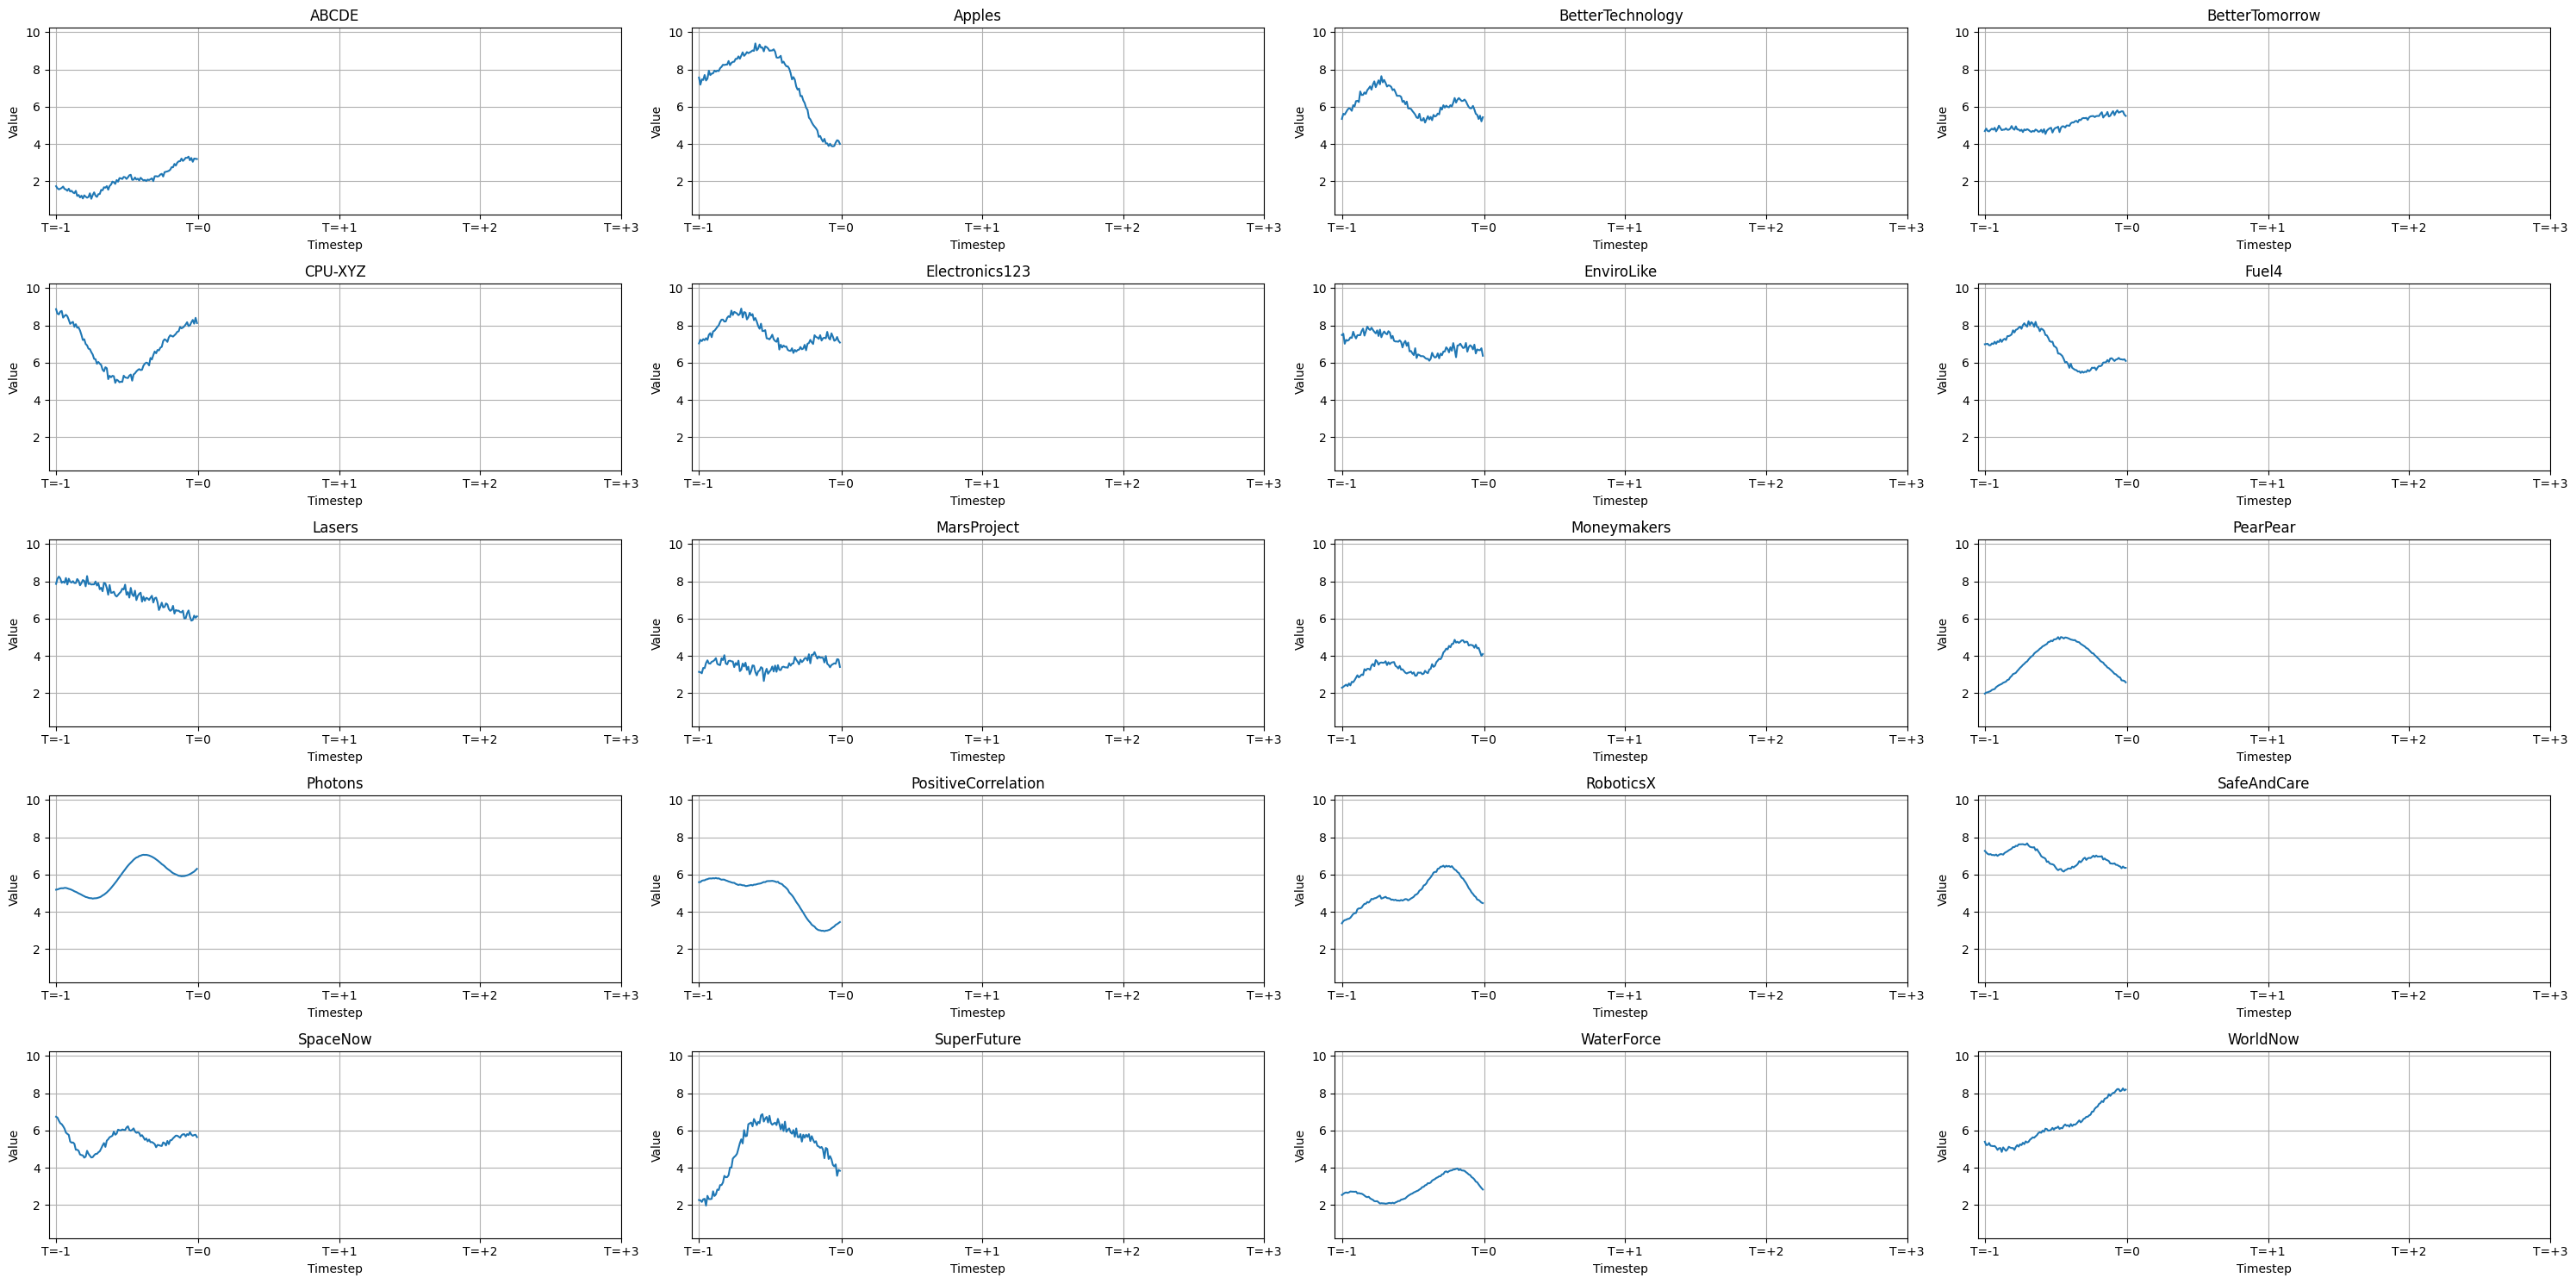

In [16]:
dr.plot_all(figsize=(30, 15), normalized_y=True)

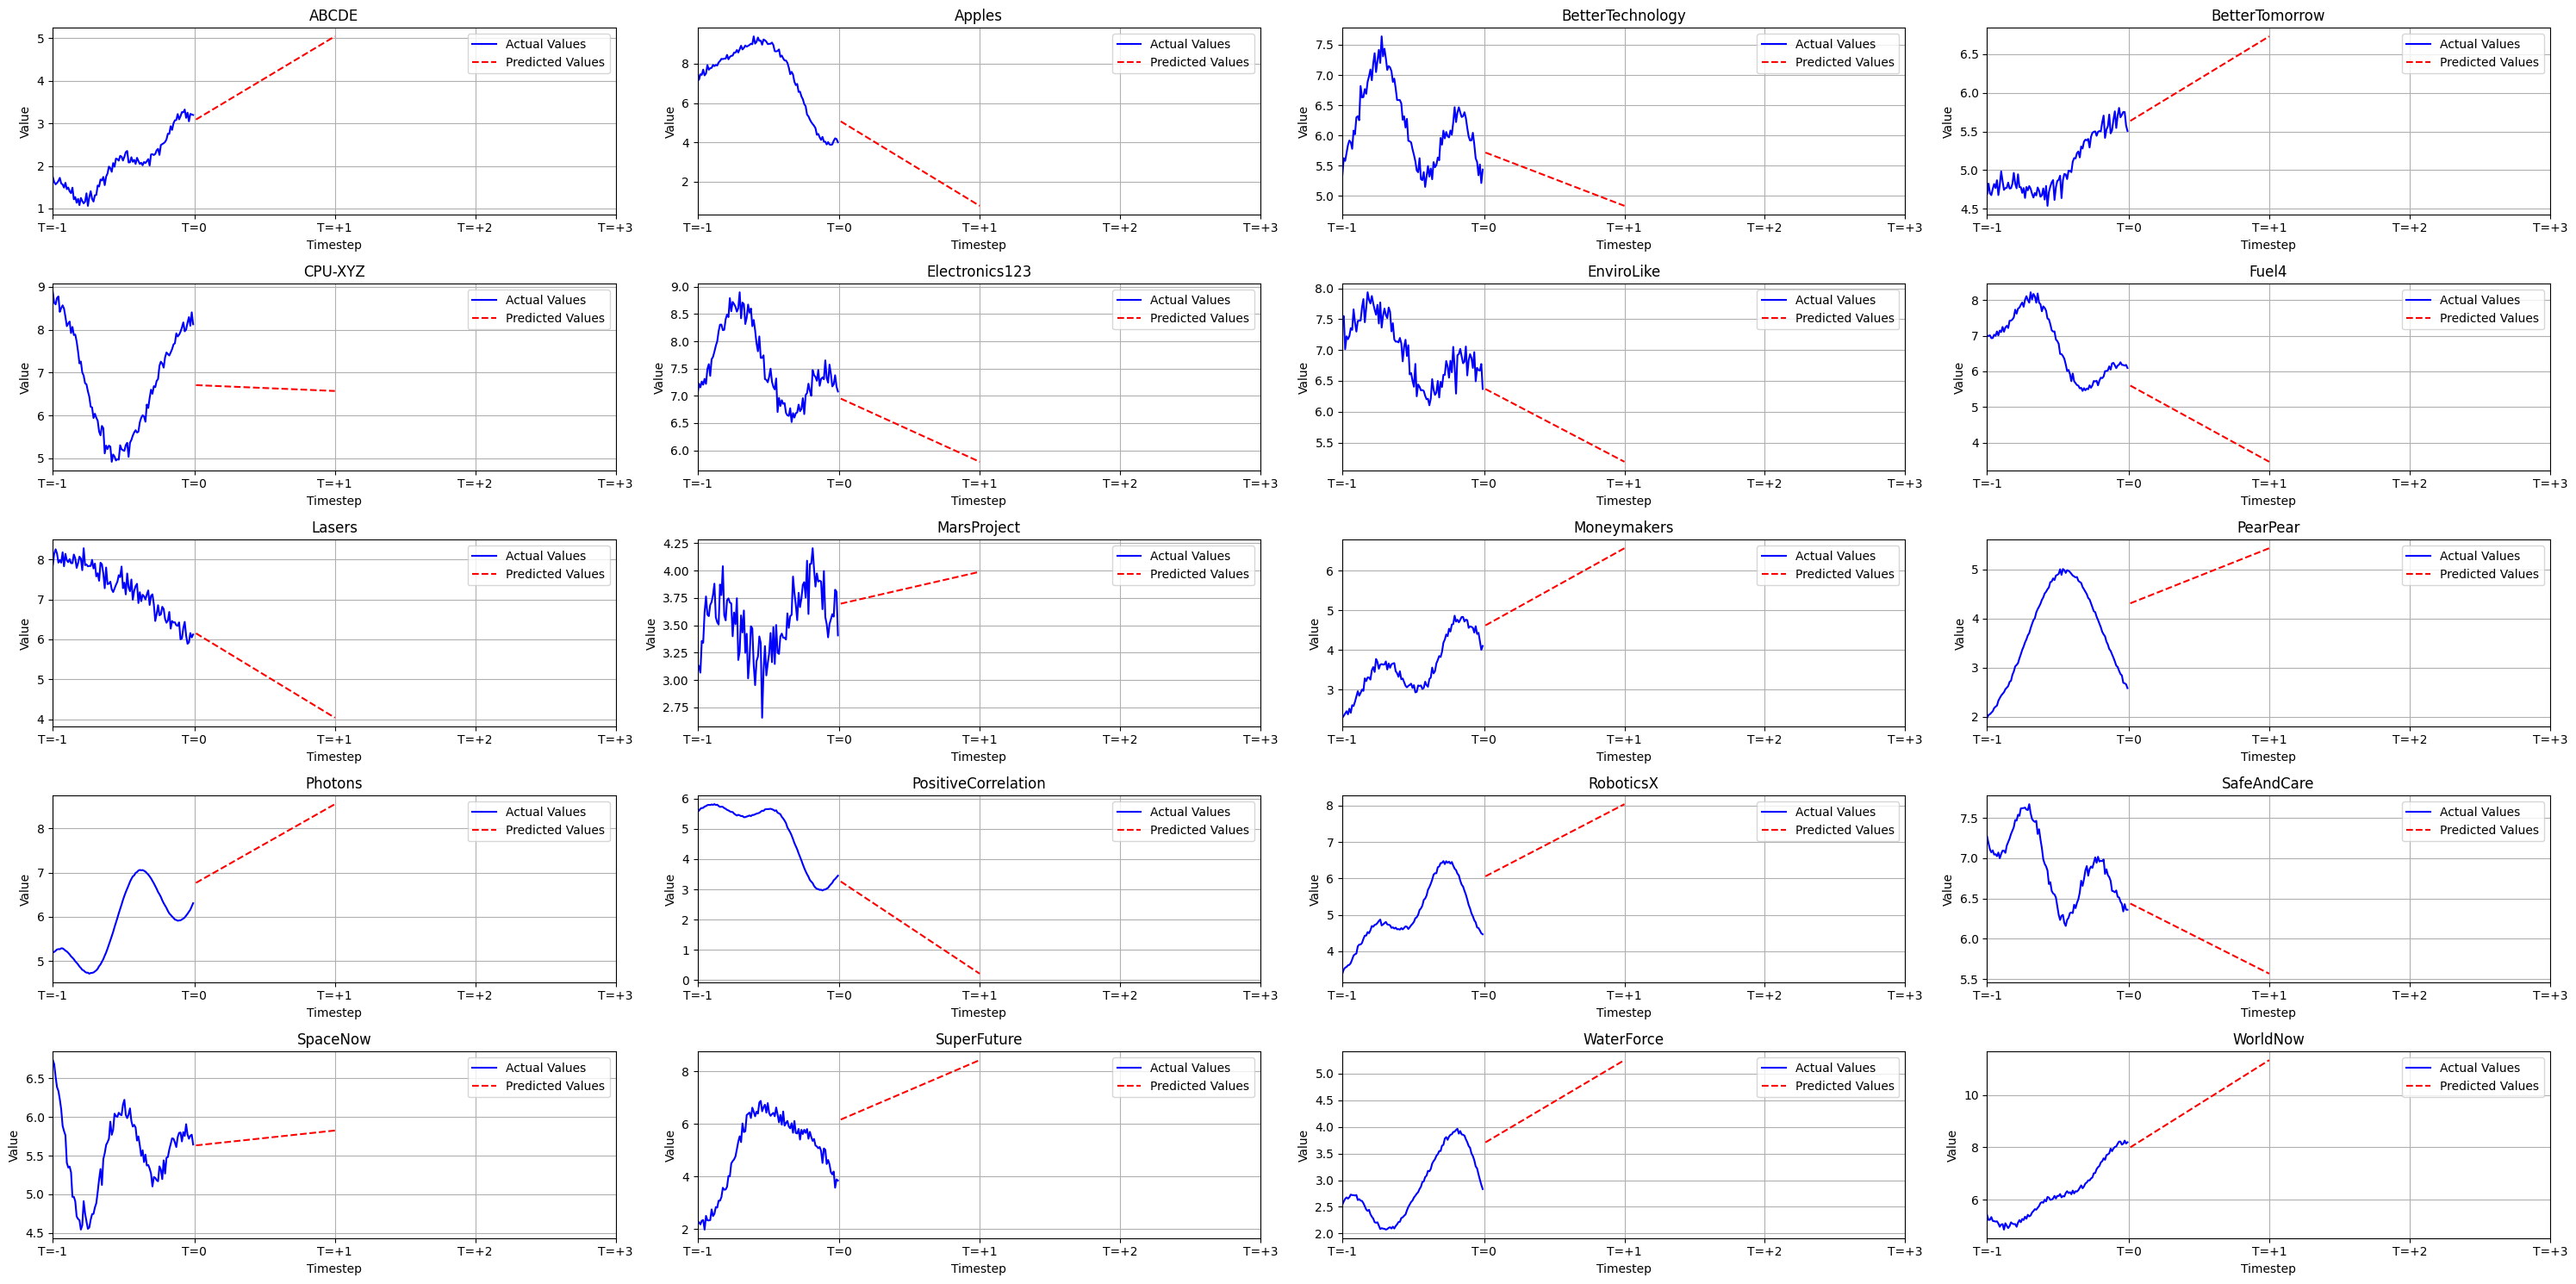

In [17]:
RMC = RegressionModelsCombined(data)
RMC.create_X_y(101)
RMC.train_linear()
predictions = RMC.predict_linear()
RMC.plot_predictions(val_range=201, predictions=predictions, figsize=(30, 15))

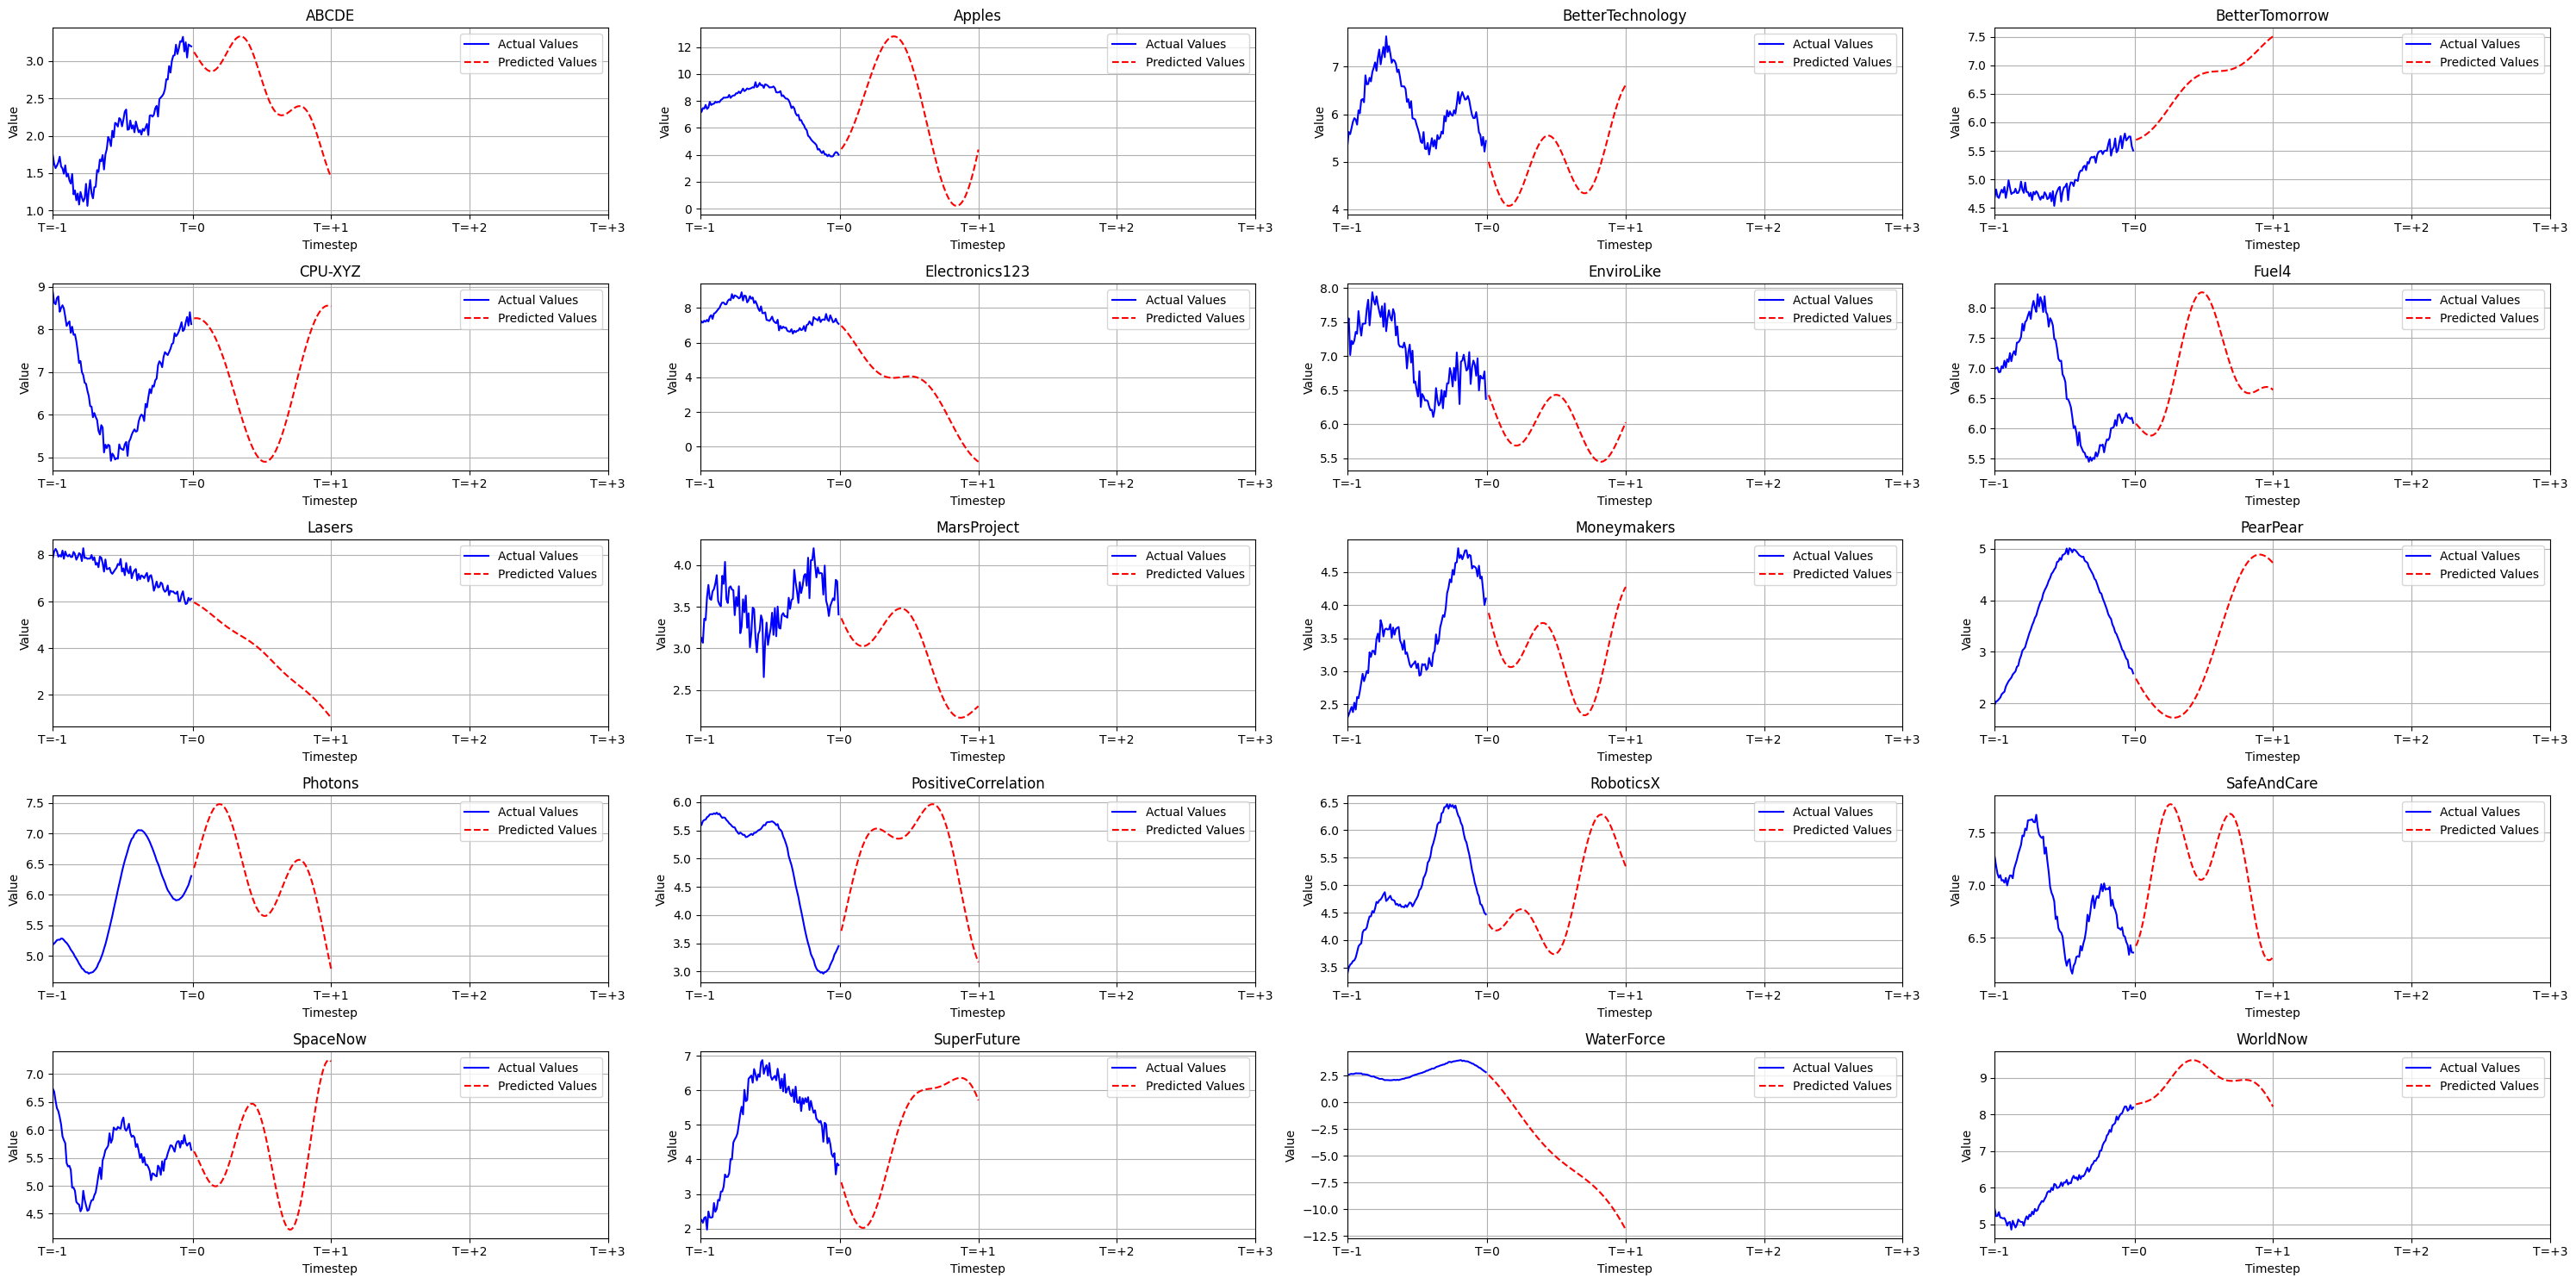

In [18]:
RMC = RegressionModelsCombined(data)
RMC.create_X_y(101)
RMC.train_sinusoidal()
predictions = RMC.predict_sinusoidal()
RMC.plot_predictions(val_range=201, predictions=predictions, figsize=(30, 15))

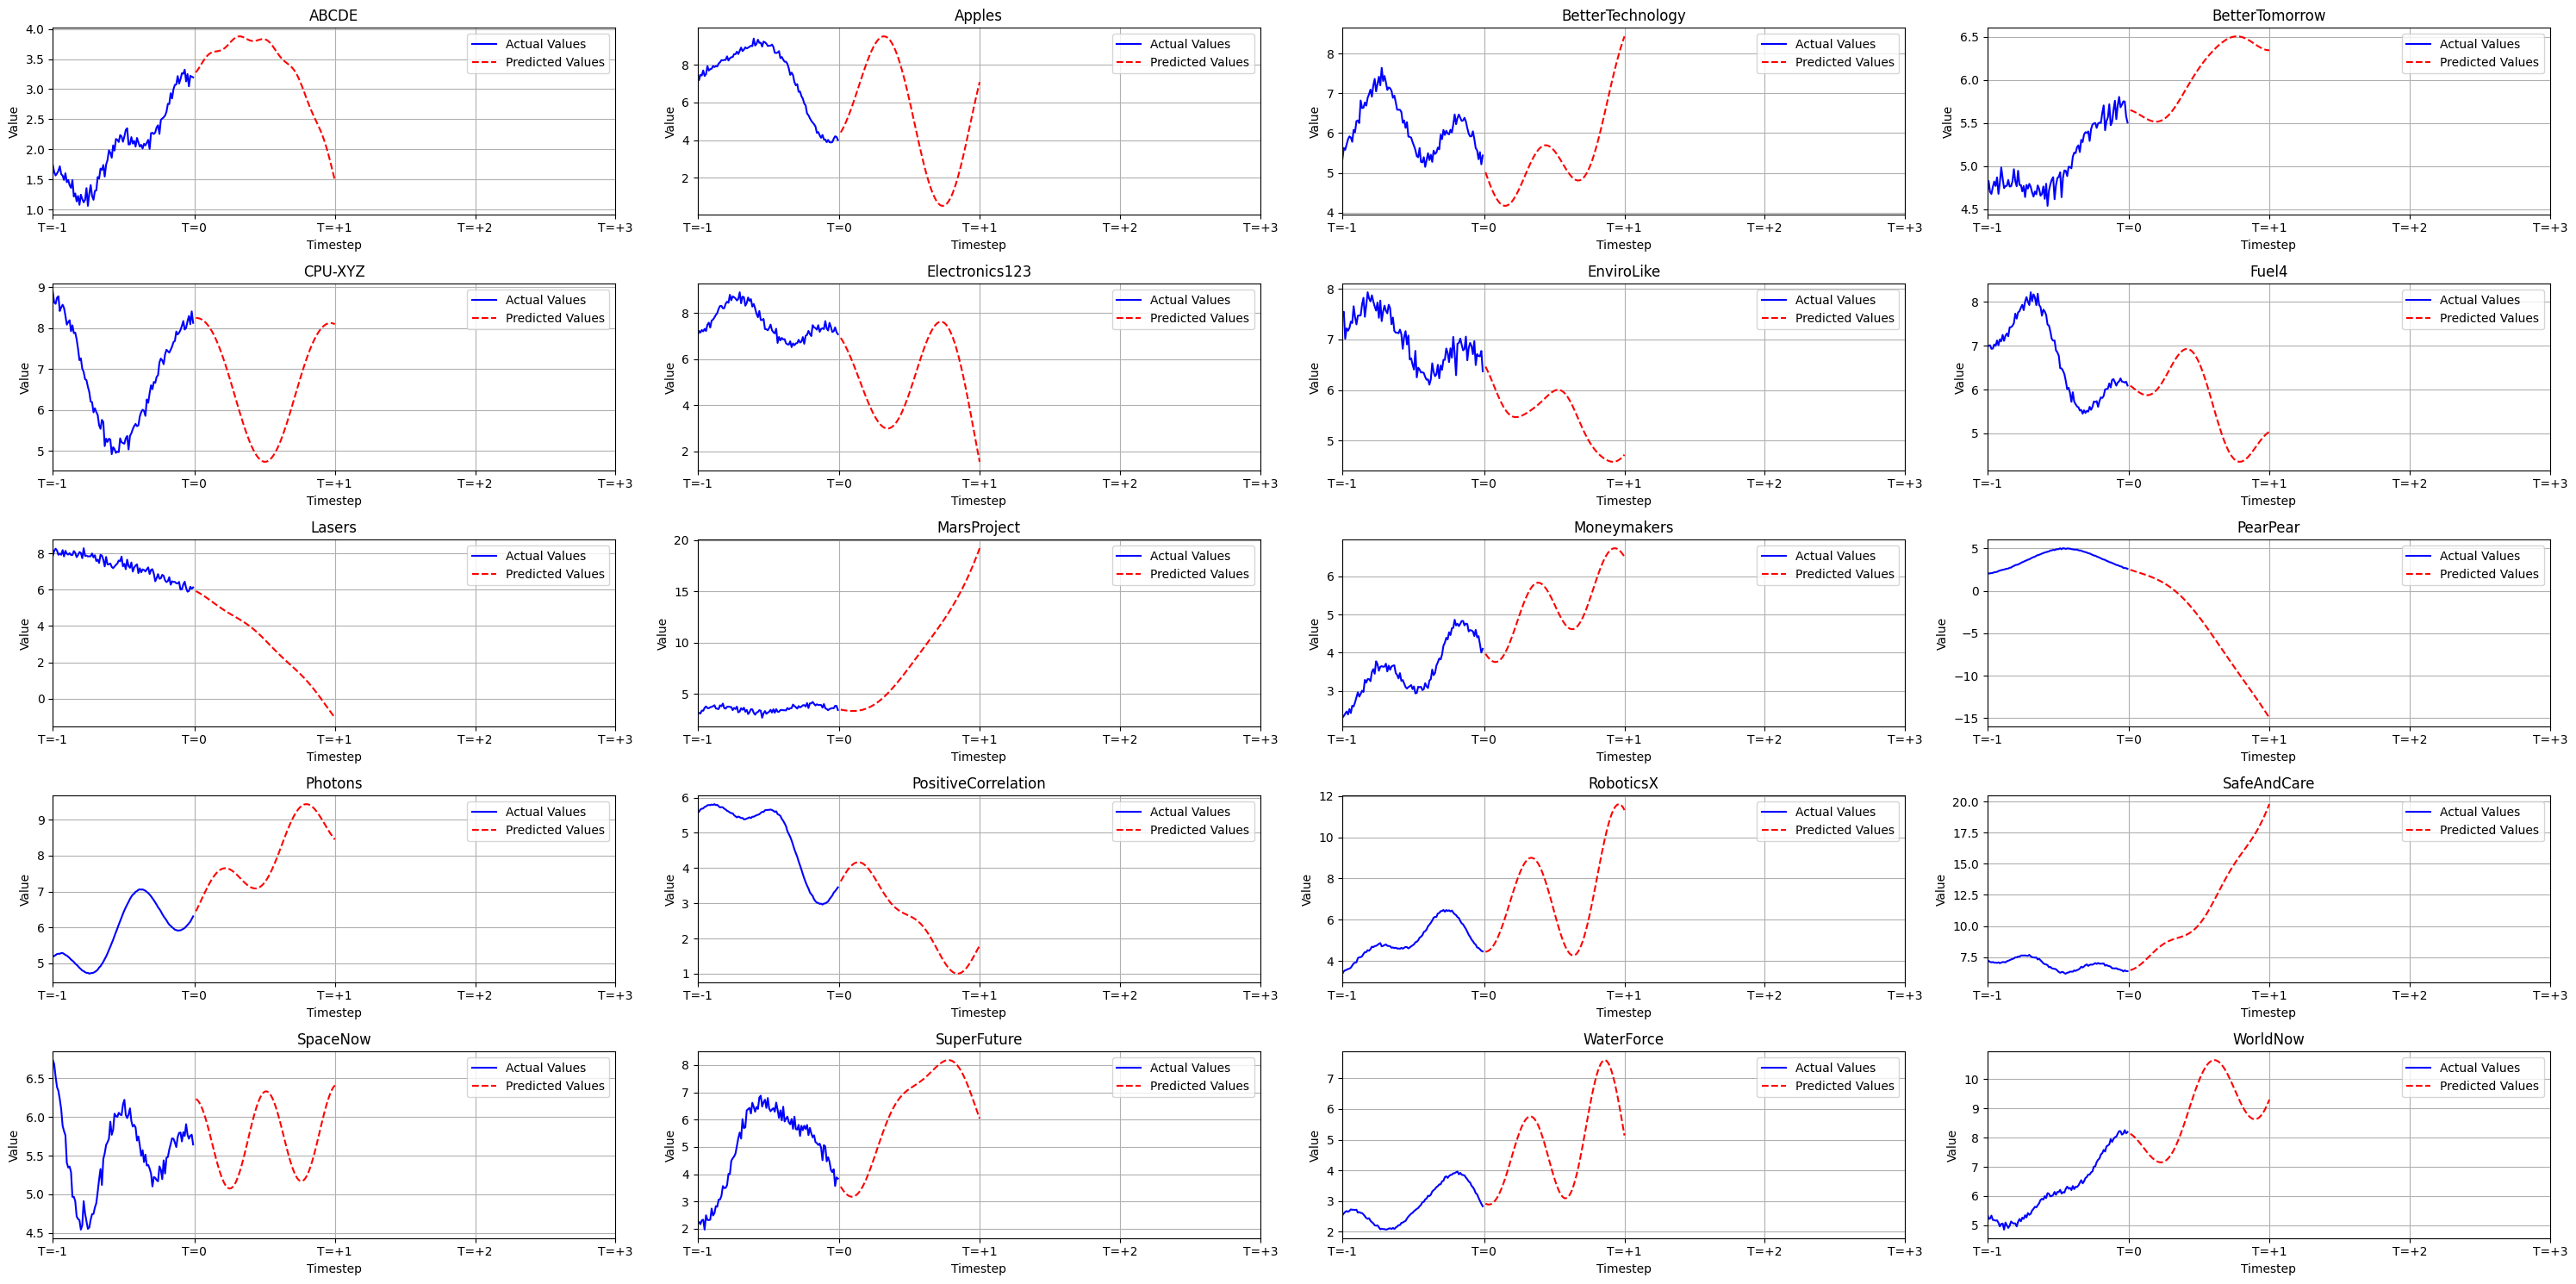

In [19]:
RMC = RegressionModelsCombined(data)
RMC.create_X_y(101)
RMC.train_complex_sinusoidal()
predictions = RMC.predict_complex_sinusoidal()
RMC.plot_predictions(val_range=201, predictions=predictions, figsize=(30, 15))

d:\MOO\MOO_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\MOO\MOO_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\MOO\MOO_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


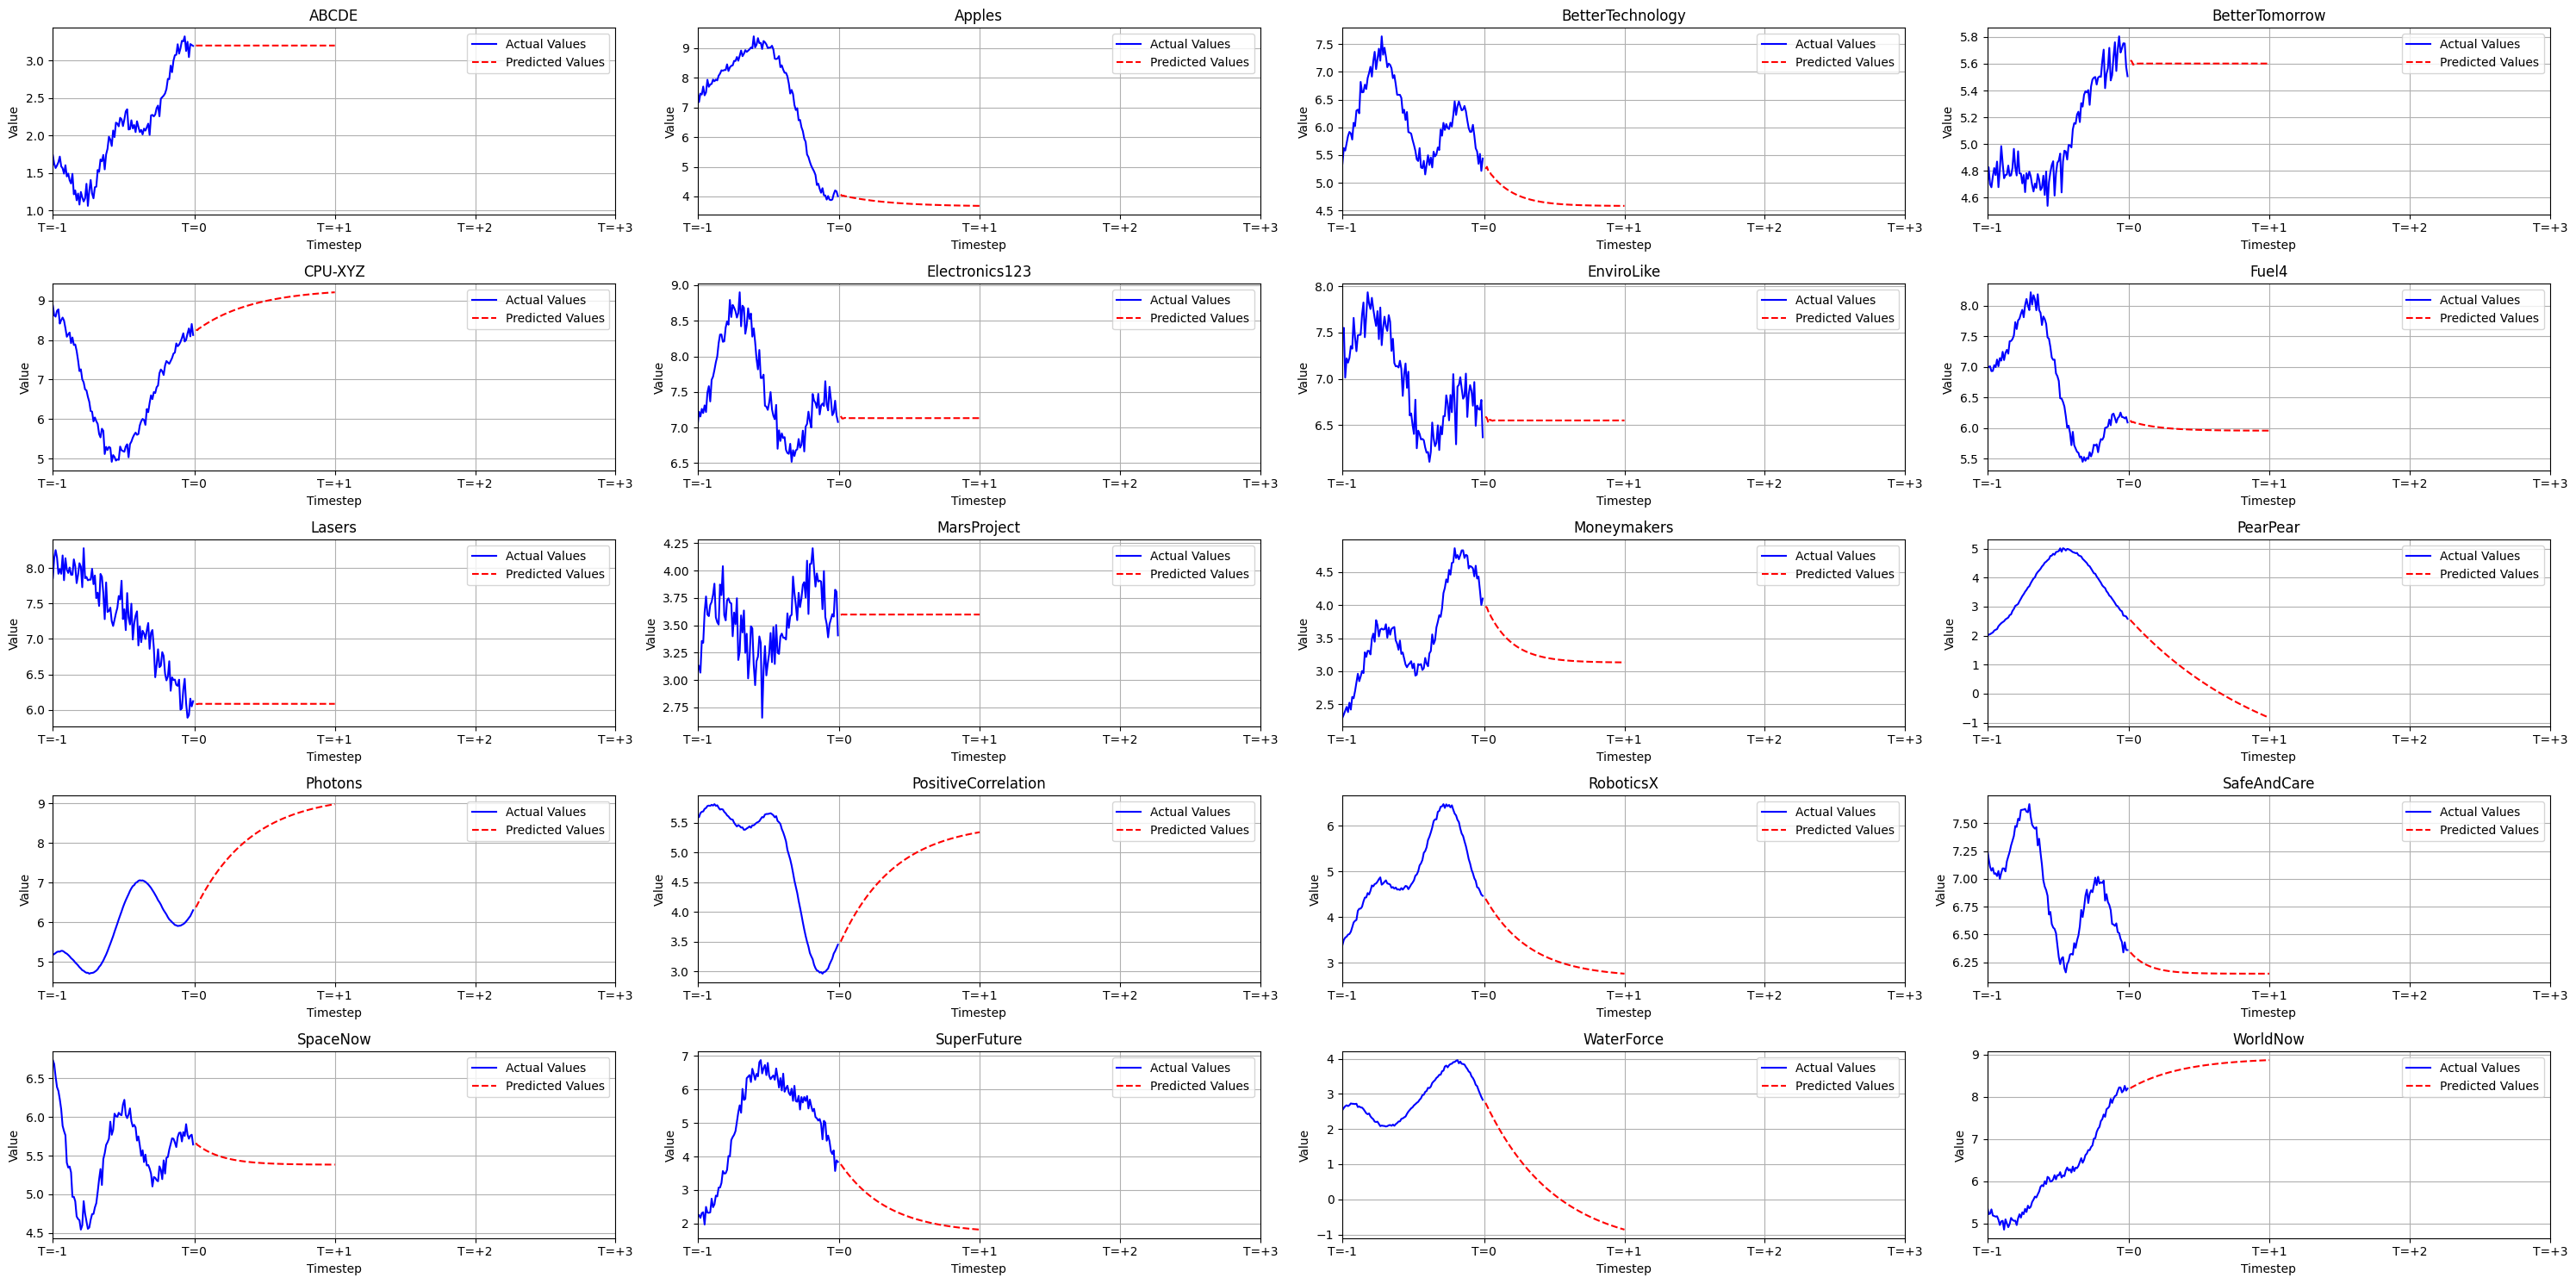

In [31]:
RMC = RegressionModelsCombined(data)
RMC.create_X_y(101)
#RMC.plot_arima_lags(max_lags=50)
RMC.train_arima(p=2, d=1, q=1)
predictions = RMC.predict_arima()
RMC.plot_predictions(val_range=201, predictions=predictions, figsize=(30, 15))

In [21]:
risks = RMC.get_covariance_matrix()
solver = Solver(data, predictions, risks)

In [22]:
solutions = solver.solve_wsm()

Running for w1=0.0, w2=1.0
     pcost       dcost       gap    pres   dres
 0: -1.8948e+00 -3.2564e+01  2e+02  2e+00  5e-16
 1: -2.6266e-01 -1.4513e+01  2e+01  8e-02  1e-15
 2: -1.0512e-01 -8.5839e-01  8e-01  6e-04  2e-15
 3: -4.7324e-01 -6.4133e-01  2e-01  2e-16  5e-16
 4: -5.4568e-01 -5.5149e-01  6e-03  2e-16  3e-16
 5: -5.4772e-01 -5.4778e-01  6e-05  2e-16  3e-16
 6: -5.4774e-01 -5.4774e-01  6e-07  2e-16  4e-16
 7: -5.4774e-01 -5.4774e-01  6e-09  1e-16  4e-16
Optimal solution found.
Running for w1=0.1, w2=0.9
     pcost       dcost       gap    pres   dres
 0: -1.3586e+00 -3.0953e+01  1e+02  2e+00  5e-16
 1: -2.0961e-01 -1.3376e+01  2e+01  7e-02  1e-15
 2: -8.6087e-02 -7.6396e-01  7e-01  6e-04  1e-15
 3: -3.3966e-01 -5.1514e-01  2e-01  2e-05  5e-16
 4: -4.1153e-01 -4.1894e-01  7e-03  4e-07  3e-16
 5: -4.1468e-01 -4.1476e-01  7e-05  4e-09  5e-16
 6: -4.1471e-01 -4.1471e-01  7e-07  4e-11  5e-16
 7: -4.1471e-01 -4.1471e-01  7e-09  4e-13  5e-16
Optimal solution found.
Running for w1=0.2

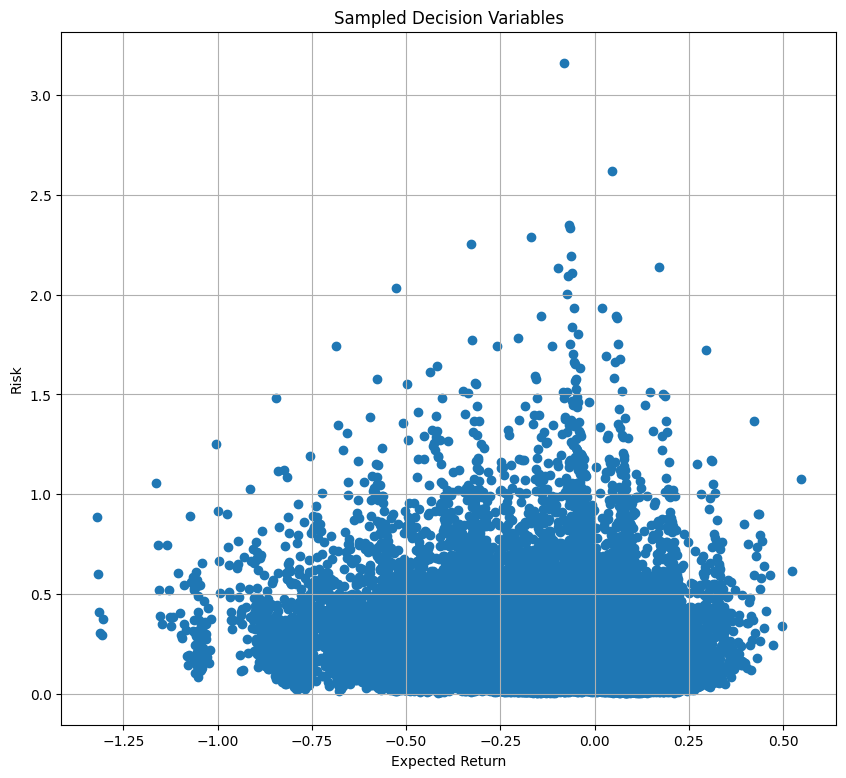

In [23]:
solver.plot_sampled_decision_variables(20, 0.2)

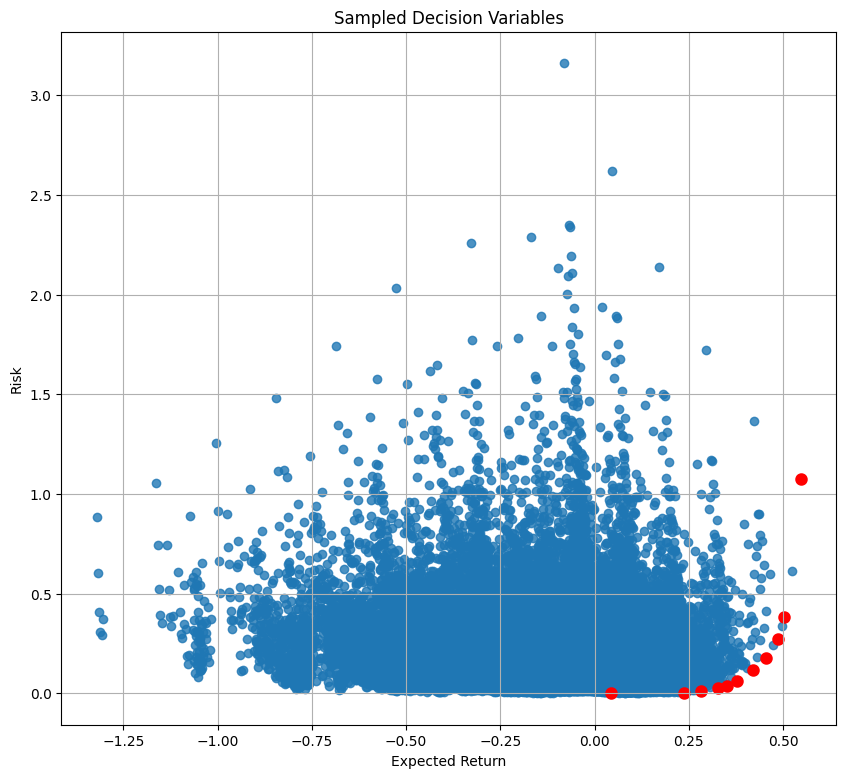

In [24]:
solver.plot_front(solutions, n=20, step=0.2)